# Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA Unzip

In [ ]:
# !unzip -O cp949 '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_01.영화.zip' -d '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터'

Archive:  /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_01.영화.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/01_0078.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/01_0029.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/01_0025.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/01_0046.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양ᄒ

In [ ]:
# !unzip -O cp949 '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_02.시리즈.zip' -d '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/series_data'
# !unzip -O cp949 '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_03.소설.zip' -d '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/novel_data'
# !unzip -O cp949 '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_04.만화.zip' -d '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/cartoon_data'

Archive:  /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/TL_02.시리즈.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/series_data/02_0034.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/series_data/02_0003.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/series_data/02_0016.json  
  inflating: /content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/series_data/02_0081.json  
  inflating: /content/drive/MyDrive/Co

SyntaxError: invalid syntax (<ipython-input-2-467ffd7402d1>, line 1)

# 데이터 파싱

학습하는데에 필요할 법한 데이터들만 추출합니다.

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
import json
import copy

file_path_exam = '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/cartoon_data/04_3904.json'
with open(file_path_exam, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

    data = []

    title = json_data['title']
    genre = json_data['genre']
    motif = json_data['motif']

    json_story_data = json_data['units']
    for unit in json_story_data:

      if 'unit_motif' not in unit.keys():
          continue
      if 'storyline' not in unit.keys():
          continue

      unit_motif = unit['unit_motif']
      unit_storyline = unit['storyline']

      story_scripts = unit['story_scripts']
      for script in story_scripts:

        if 'act' not in script.keys():
          continue
        if 'emotion' not in script.keys():
          continue
        if 'content' not in script.keys():
          continue

        scene_act = script['act']
        scene_emotion = script['emotion']
        scene_content = script['content']

        temp = (title, genre, motif, unit_motif, unit_storyline, scene_act, scene_emotion, scene_content)
        data.append(copy.deepcopy(temp))

df = pd.DataFrame(data, columns=['title', 'genre', 'motif', 'unit_motif', 'unit_storyline', 'scene_act', 'scene_emotion', 'scene_content'])
df

,title,genre,motif,unit_motif,unit_storyline,scene_act,scene_emotion,scene_content
0,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,진실 고백,C001는 고백했다고 C003에게 말한다.,만나다,담담하다,C001는 C003를 만난다.
1,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,진실 고백,C001는 고백했다고 C003에게 말한다.,말하다,설레다,C001는 C002에게 고백했다고 말한다.
2,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,진실 고백,C001는 고백했다고 C003에게 말한다.,묻는다,궁금하다,C002 씨는 고백을 듣고 뭐라고 했어?
3,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,진실 고백,C001는 고백했다고 C003에게 말한다.,대답한다,기쁘다,이혼하지 말자고 했어.
4,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,진실 고백,C001는 고백했다고 C003에게 말한다.,말하다,담담하다,그게 고백을 받아준 게 맞나?
...,...,...,...,...,...,...,...,...
154,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,이혼,C002는 C001에게 이혼하자고 한다.,터치하다/만지다,초조하다,C002는 C001의 손을 잡는다.
155,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,이혼,C002는 C001에게 이혼하자고 한다.,포옹하다/껴안다,설레다,C002는 C001에게 포옹한다.
156,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,이혼,C002는 C001에게 이혼하자고 한다.,말하다,담담하다,C002는 C001에게 이혼하자고 한다.
157,절대 서로 반하지 맙시다! 8,[멜로/로맨스],짝사랑,이혼,C002는 C001에게 이혼하자고 한다.,생각하다,설레다,C002는 이혼 후 새롭게 시작하려고 생각한다.


## 모든 데이터 추출

glob을 통해 모든 파일을 묶고, 한 번에 추출합니다.
또한 concat을 통해 하나의 큰 DataFrame으로 변환합니다.

In [ ]:
# 이건 아님 !!!!!!!!
# 새로 짜야함

# import pandas as pd
# import glob
# from tqdm.auto import tqdm

# # JSON 파일들이 있는 디렉토리 경로와 패턴 설정
# csv_files = glob.glob("/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/data/145.다양한 문화콘텐츠 스토리 데이터/01-1.정식개방데이터/Training/02.라벨링데이터/cartoon_data/*.json")

# # 각 JSON 파일을 읽어와서 하나의 리스트에 저장
# df_list = [pd.read_json(file) for file in tqdm(csv_files[:-1])]

# # 모든 JSON 파일들을 하나의 DataFrame으로 병합
# combined_df = pd.concat(df_list, ignore_index=True)

# # 결과 확인
# print(combined_df)

  0%|          | 0/73113 [00:00<?, ?it/s]

               관광지명                                                 개요  \
0              강문해변  강문해변은 강문동에 위치하며 인근에 작은 강문항이 있어 새벽에 잡은 싱싱한 생선회를...   
1               갈남항  수로부인헌화공원이 있는 임원항에서 북쪽으로 약 7.3Km 떨어진 신남항에 위치한 해...   
2              38해변  38해변은 38(휴게소) 근처에 있어서 7번 국도변을 따라 쉽게 접근할 수 있는 해...   
3             가야동계곡  설악산국립공원의 내설악 쪽에 위치한 수렴동 계곡을 지나면 왼쪽으로 돌아가면 가야동 ...   
4           가리산(홍천)  고지대에 위치한 가리산은 춘천시와 홍천군 경계지역에 있으며, 정상에서는 아름다운 풍...   
...             ...                                                ...   
73108   국립 검마산자연휴양림  신원리에 위치한 검마산 자연휴양림은 넓은 구역면적인 7866 ha로 가족 및 청소년...   
73109   국립 검마산자연휴양림  신원리에 위치한 검마산 자연휴양림은 외국인 관광객들에게 매우 인상적인 장소입니다. ...   
73110  국립 낙안민속자연휴양림  낙안민속자연휴양림은 접근성이 우수한 교통 요충지로, 전라선과 경전선이 교차하며 남해...   
73111   국립 검마산자연휴양림  신원리에 위치한 검마산 자연휴양림은 7866 ha의 면적을 가진 심신단련장으로, 산...   
73112  국립 낙안민속자연휴양림  전라선과 경전선이 교차하는 지역에서는 남해고속도로와 호남고속도로가 만나 접근성이 매...   

                        주소(AD) 교통(TR) 일정(DA)  \
0                          NaN    NaN    NaN   
1              

In [ ]:
# import pandas as pd

# file_path = '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/train_story.csv'
# StoryMaker_Data = pd.read_csv(file_path)
# StoryMaker_Data

,Unnamed: 0,genre,motif,unit_motif,narrative_stage_combined,emotion_combined,content_combined
0,0,"['멜로/로맨스', '액션']",오해(착각),진실 고백,결말,경멸,"너 정체가 뭐야? 경찰이야? 그럼, 검찰이야?"
1,1,"['멜로/로맨스', '액션'] ['미스터리', '스릴러']",대체역사 오해(착각),적 제압/퇴치 진실 고백,결말,경멸,"그럼, 국정원? 자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를..."
2,2,['드라마'] ['멜로/로맨스'] ['액션'],마약거래자 연인 상실 적군과의 우정,극복 이별 재회,결말,경멸,"처음 만난 날, 내가 골탕 먹여서 복수한 거죠? C001이 C008을 떼어놓는다. ..."
3,3,['스릴러'],광기어린 사랑,그리움,결말,경멸,C005이 의아한 표정을 짓다가 C003를 본다. 무슨 일 있었어? 무슨 일인지 말해봐.
4,4,"['드라마', '스릴러', '액션'] ['멜로/로맨스'] ['스릴러']",광기어린 사랑 덜떨어진 영웅 아름다운 불륜,가족 분열 그리움 보상 획득,결말,경멸,C005이 고갤 갸웃거리다가 차에 시동을 건다. 두현도 이혼 서류에 도장을 찍는다....
...,...,...,...,...,...,...,...
293216,293216,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심 재결합,절정,행복,C001는 C002의 제안을 받아들인다. 네가 너무 좋아. C002은 바다로 뛰어가...
293217,293217,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심,절정,행복,C002은 C001를 끌어안는다. 그럼 네가 내 남자친구인 거네. C002은 C00...
293218,293218,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심 진실 고백,절정,행복,C001는 웃음을 터뜨린다. C002은 집으로 돌아온다. 맞아요. 즐거웠어요.
293219,293219,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,절정,행복,솔직하게 말해줘서 고맙다. C002은 C001와 함께했던 시간을 회상한다. 그럼 우...


In [ ]:
# from tqdm.auto import tqdm

# StoryMaker_Data['before_content'] = ''
# for idx, row in tqdm(StoryMaker_Data.iterrows()):
#   before_content = row['content_combined']
#   if idx == len(StoryMaker_Data)-1:
#     break
#   StoryMaker_Data.iloc[idx+1, -1] = before_content

# StoryMaker_Data.head()

0it [00:00, ?it/s]

,Unnamed: 0,genre,motif,unit_motif,narrative_stage_combined,emotion_combined,content_combined,before_content
0,0,"['멜로/로맨스', '액션']",오해(착각),진실 고백,결말,경멸,"너 정체가 뭐야? 경찰이야? 그럼, 검찰이야?",
1,1,"['멜로/로맨스', '액션'] ['미스터리', '스릴러']",대체역사 오해(착각),적 제압/퇴치 진실 고백,결말,경멸,"그럼, 국정원? 자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를...","너 정체가 뭐야? 경찰이야? 그럼, 검찰이야?"
2,2,['드라마'] ['멜로/로맨스'] ['액션'],마약거래자 연인 상실 적군과의 우정,극복 이별 재회,결말,경멸,"처음 만난 날, 내가 골탕 먹여서 복수한 거죠? C001이 C008을 떼어놓는다. ...","그럼, 국정원? 자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를..."
3,3,['스릴러'],광기어린 사랑,그리움,결말,경멸,C005이 의아한 표정을 짓다가 C003를 본다. 무슨 일 있었어? 무슨 일인지 말해봐.,"처음 만난 날, 내가 골탕 먹여서 복수한 거죠? C001이 C008을 떼어놓는다. ..."
4,4,"['드라마', '스릴러', '액션'] ['멜로/로맨스'] ['스릴러']",광기어린 사랑 덜떨어진 영웅 아름다운 불륜,가족 분열 그리움 보상 획득,결말,경멸,C005이 고갤 갸웃거리다가 차에 시동을 건다. 두현도 이혼 서류에 도장을 찍는다....,C005이 의아한 표정을 짓다가 C003를 본다. 무슨 일 있었어? 무슨 일인지 말해봐.


In [ ]:
# StoryMaker_Data.drop(index=0, axis=0, inplace=True)
# StoryMaker_Data

,Unnamed: 0,genre,motif,unit_motif,narrative_stage_combined,emotion_combined,content_combined,before_content
1,1,"['멜로/로맨스', '액션'] ['미스터리', '스릴러']",대체역사 오해(착각),적 제압/퇴치 진실 고백,결말,경멸,"그럼, 국정원? 자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를...","너 정체가 뭐야? 경찰이야? 그럼, 검찰이야?"
2,2,['드라마'] ['멜로/로맨스'] ['액션'],마약거래자 연인 상실 적군과의 우정,극복 이별 재회,결말,경멸,"처음 만난 날, 내가 골탕 먹여서 복수한 거죠? C001이 C008을 떼어놓는다. ...","그럼, 국정원? 자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를..."
3,3,['스릴러'],광기어린 사랑,그리움,결말,경멸,C005이 의아한 표정을 짓다가 C003를 본다. 무슨 일 있었어? 무슨 일인지 말해봐.,"처음 만난 날, 내가 골탕 먹여서 복수한 거죠? C001이 C008을 떼어놓는다. ..."
4,4,"['드라마', '스릴러', '액션'] ['멜로/로맨스'] ['스릴러']",광기어린 사랑 덜떨어진 영웅 아름다운 불륜,가족 분열 그리움 보상 획득,결말,경멸,C005이 고갤 갸웃거리다가 차에 시동을 건다. 두현도 이혼 서류에 도장을 찍는다....,C005이 의아한 표정을 짓다가 C003를 본다. 무슨 일 있었어? 무슨 일인지 말해봐.
5,5,"['드라마', '스릴러', '액션'] ['드라마', '스릴러'] ['스릴러', '액...",간통 덜떨어진 영웅 우발적 살인,보상 획득 죽음 협박,결말,경멸,C004이 C001의 뺨을 툭툭 치자 C001가 C004의 머리를 박치기해 기절시킨...,C005이 고갤 갸웃거리다가 차에 시동을 건다. 두현도 이혼 서류에 도장을 찍는다....
...,...,...,...,...,...,...,...,...
293216,293216,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심 재결합,절정,행복,C001는 C002의 제안을 받아들인다. 네가 너무 좋아. C002은 바다로 뛰어가...,네 말 믿을게. C001는 C002에게 키스한다. C002은 C001에게 일요일에 ...
293217,293217,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심,절정,행복,C002은 C001를 끌어안는다. 그럼 네가 내 남자친구인 거네. C002은 C00...,C001는 C002의 제안을 받아들인다. 네가 너무 좋아. C002은 바다로 뛰어가...
293218,293218,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,결심 진실 고백,절정,행복,C001는 웃음을 터뜨린다. C002은 집으로 돌아온다. 맞아요. 즐거웠어요.,C002은 C001를 끌어안는다. 그럼 네가 내 남자친구인 거네. C002은 C00...
293219,293219,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,절정,행복,솔직하게 말해줘서 고맙다. C002은 C001와 함께했던 시간을 회상한다. 그럼 우...,C001는 웃음을 터뜨린다. C002은 집으로 돌아온다. 맞아요. 즐거웠어요.


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/DeepdaivMainProject/story_mapping+character+order.csv'
StoryMaker_Data = pd.read_csv(file_path)
StoryMaker_Data

,Unnamed: 0,genre,motif,unit_motif,unit_stage,scene_chracter,scene_emotion,scene_content,narrative_stage,mapped_emotion
0,0,"['판타지', '드라마']",납치,['비밀의 공유'],['Final Salvo'],"[""['C003']"", ""['C008']""]","['담담하다', '단호하다']","['저희 집의 방보다 훨씬 작은데 괜찮으세요?', '딴 소리 말고, 얼른 보여줘요....",결말,['중립']
1,1,"['판타지', '드라마']",납치,['비밀의 공유'],['Final Salvo'],"[""['C003']"", ""['C008']""]","['담담하다', '놀라다']","['C008이 낡은 수첩을 보여준다.', 'C003가 수첩을 본다.', '말도 안 ...",결말,"['관심', '중립']"
2,2,"['판타지', '드라마']",납치,['비밀의 공유'],['Final Salvo'],"[""['C003']"", ""['C008']""]","['궁금하다', '놀라다']","['C003의 말을 듣고 궁금해한다.', '왜 그리 놀라십니까?', 'C003가 수...",결말,['관심']
3,3,"['판타지', '드라마']",납치,['비밀의 공유'],['Final Salvo'],"[""['C003']""]",['놀라다'],['C003는 수첩 마지막 장에 적힌 자신의 이름을 보고 놀란다.'],결말,['관심']
4,4,"['판타지', '드라마']",납치,['공적인 입장표명'],['Opening Salvo'],"[""['중신1']"", ""['C002']""]","['단호하다', '초조하다']","['C002이 발표한다.', 'C001은 역모를 꾸미지 않았다. 그러니 C001은 ...",도입,"['중립', '두려움']"
...,...,...,...,...,...,...,...,...,...,...
298267,129,['멜로/로맨스'],첫눈에 반한 사랑,['회의감'],['Choice to Fight'],"[""['여선생']"", ""['C002']""]","['괴롭다', '담담하다', '안타깝다']","['네 편이야.', 'C002이 집안일을 한다.', 'C002이 설거지를 하며 운다.']",절정,"['중립', '슬픔']"
298268,130,['멜로/로맨스'],첫눈에 반한 사랑,['재회'],['Resurrection'],"[""['C001']"", ""['C002']""]","['씁쓸하다', '반갑다', '긴장되다']","['저기요.', 'C002이 C001에게 인사한다.', 'C001이 C002에게 선...",절정,"['두려움', '슬픔', '행복']"
298269,131,['멜로/로맨스'],첫눈에 반한 사랑,['재회'],['Resurrection'],"[""['C001']""]","['불편하다', '당황하다']","['반가워요.', '잠시만요.', 'C001이 강의실 뒤편을 기웃거린다.']",절정,"['분노', '두려움']"
298270,132,['멜로/로맨스'],첫눈에 반한 사랑,['재회'],['Resurrection'],"[""['아줌마']"", ""['C001']"", ""['C002']""]","['황당하다', '초조하다']","['뒷문 없나요?', '아줌마가 C001에게 뒷문은 없다고 말한다.', 'C002이...",절정,"['분노', '두려움']"


In [ ]:
import re

content = str(StoryMaker_Data['scene_content'][0])
content = re.sub(r"[\[\]']", r"", content)
content = re.sub(r",", r" ", content)
content

'저희 집의 방보다 훨씬 작은데 괜찮으세요?  딴 소리 말고  얼른 보여줘요.  C003를 바라본다.'

In [ ]:
StoryMaker_Data['scene_content'] = StoryMaker_Data['scene_content'].map(lambda x: str(x))
StoryMaker_Data['scene_content'] = StoryMaker_Data['scene_content'].map(lambda x: re.sub(r"[\[\]']", r"", x))
StoryMaker_Data['scene_content'] = StoryMaker_Data['scene_content'].map(lambda x: re.sub(r",", r" ", x))
StoryMaker_Data['scene_content']

,scene_content
0,저희 집의 방보다 훨씬 작은데 괜찮으세요? 딴 소리 말고 얼른 보여줘요. C0...
1,C008이 낡은 수첩을 보여준다. C003가 수첩을 본다. 말도 안 돼. 이게 ...
2,C003의 말을 듣고 궁금해한다. 왜 그리 놀라십니까? C003가 수첩을 만진다.
3,C003는 수첩 마지막 장에 적힌 자신의 이름을 보고 놀란다.
4,C002이 발표한다. C001은 역모를 꾸미지 않았다. 그러니 C001은 더 이상...
...,...
298267,네 편이야. C002이 집안일을 한다. C002이 설거지를 하며 운다.
298268,저기요. C002이 C001에게 인사한다. C001이 C002에게 선생님이 된 ...
298269,반가워요. 잠시만요. C001이 강의실 뒤편을 기웃거린다.
298270,뒷문 없나요? 아줌마가 C001에게 뒷문은 없다고 말한다. C002이 학원 앞에...


# GPT Load

In [ ]:
import torch

In [ ]:
from transformers import GPT2LMHeadModel

In [ ]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2", bos_token='</s>', eos_token='</s>', unk_token='<unk>', pad_token='<pad>',
                                                    mask_token='<mask>')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 57.4 MB/s eta 0:00:00


# 사전 학습만 된 GPT 사용 예제 출력

In [ ]:
import torch
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
text = '근육이 커지기 위해서는'
input_ids = tokenizer.encode(text, return_tensors='pt')
gen_ids = model.generate(input_ids,
                         max_length=128,
                         repetition_penalty=2.0,
                         pad_token_id=tokenizer.pad_token_id,
                         eos_token_id=tokenizer.eos_token_id,
                         bos_token_id=tokenizer.bos_token_id,
                         use_cache=True)
generated = tokenizer.decode(gen_ids[0])
print(generated)

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

근육이 커지기 위해서는 무엇보다 규칙적인 생활습관이 중요하다.
특히, 아침식사는 단백질과 비타민이 풍부한 과일과 채소를 많이 섭취하는 것이 좋다.
또한 하루 30분 이상 충분한 수면을 취하는 것도 도움이 된다.
아침 식사를 거르지 않고 규칙적으로 운동을 하면 혈액순환에 도움을 줄 뿐만 아니라 신진대사를 촉진해 체내 노폐물을 배출하고 혈압을 낮춰준다.
운동은 하루에 10분 정도만 하는 게 좋으며 운동 후에는 반드시 스트레칭을 통해 근육량을 늘리고 유연성을 높여야 한다.
운동 후 바로 잠자리에 드는 것은 피해야 하며 특히 아침에 일어나면 몸이 피곤해지기 때문에 무리하게 움직이면 오히려 역효과가 날 수도 있다.
운동을


In [ ]:
# import os
# os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
# torch.cuda.empty_cache()
# torch.cuda.is_available()

True

# 한 토큰씩 학습

In [ ]:
import numpy as np
import pandas as pd
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.core import LightningModule
from torch.utils.data import DataLoader, Dataset
from transformers.optimization import AdamW, get_cosine_schedule_with_warmup
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
import re, os
from tqdm import tqdm


# 토큰을 정의
Q_TKN = "<usr>" # Q 토큰
A_TKN = "<sys>" # A 토큰
BOS = "</s>" # Beginning of sentence, 문장 시작 토큰
EOS = "</s>" # End of sentence, 문장 마무리 토큰
MASK = "<unused0>" # 사용하지 않는 토큰을 mask로 사용
SENT = "<unused1>" # 사용하지 않는 토큰을 sent, 즉 구분자로 사용
PAD = "<pad>" # pad, 입력의 길이를 맞추기 위한 pad토큰

save_dir = "saved_models" # 모델을 저장할 디렉토리 이름
os.makedirs(save_dir, exist_ok=True) # 디렉토리 만들기


print("start1")


# 추후 모델의 input데이터를 책임질 클래스 정의
class StoryMakerDataset(Dataset):
    def __init__(self, chats, max_len=200):  # 데이터셋의 전처리를 해주는 부분
        self._data = chats # chat데이터를 _data로 저장
        self.max_len = max_len # input이 되는 문장의 최대 길이 설정, 실제 input뒤에 max_len까지만큼 pad값을 넣어서 모든 input의 길이를 통일 시켜줄것임
        # 각종 토큰 재할당
        self.q_token = Q_TKN
        self.a_token = A_TKN
        self.sent_token = SENT
        self.eos = EOS
        self.mask = MASK
        # GPT에서 사용하는 토크나이저 재할당
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self._data)

    def __getitem__(self, idx): # idx에 해당하는 input을 return해주는 함수
        turn = self._data.iloc[idx] # df의 idx번째 row를 추출
        data = turn["scene_content"] # 그 row에서 content만을 추출
        # data = re.sub(r"([?.!,])", r" ", data) # 각종 문자 전처리
        data = self.tokenizer.tokenize(data) # 토크나이징
        data = self.tokenizer.convert_tokens_to_ids(data) # 토큰화 한것을 index로 변환, 이 작업들은 사전 정의된 토크나이저에 의해 수행됨

        # input의 길이를 맞추기 위해 뒤에 pad값을 넣어 max_len으로 길이를 맞춤
        while len(data) < self.max_len:
          data += [self.tokenizer.pad_token_id]

        # tensor로 변환해서 return
        data = np.asarray(data)
        return torch.LongTensor(data)


# 토크나이저 가져오기
koGPT2_TOKENIZER = PreTrainedTokenizerFast.from_pretrained(
    "skt/kogpt2-base-v2",
    bos_token=BOS,
    eos_token=EOS,
    unk_token="<unk>",
    pad_token=PAD,
    mask_token=MASK,
)
# 모델 가져오기
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")


print("start3")

# GPU사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 가져오기
train_set = StoryMakerDataset(StoryMaker_Data, max_len=200)
train_dataloader = DataLoader(
    train_set,
    batch_size=32,
    num_workers=0,
    shuffle=True,
)

# 모델을 GPU로 이동
model.to(device)

# 학습률 및 하이퍼파라미터 수정
learning_rate = 3e-5
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 하이퍼 파라미터 수정2222
epoch = 2
Sneg = -1e18


# 학습
for epoch in range(epoch):
    dataloader = tqdm(train_dataloader, desc=f"Epoch {epoch}")
    for batch_idx, samples in enumerate(dataloader):

        # 옵티마이저 초기화
        optimizer.zero_grad()
        # input을 GPU로 이동
        samples = samples.to(device)
        # 정답 레이블을 자신으로 설정하고 학습 시작
        out = model(samples, labels=samples)
        # loss를 구해서
        loss = out[0]
        # 파라미터 수정
        loss.backward()

        # 배치를 1000개씩 학습 완료할때마다 loss출력
        if batch_idx % 1000 == 0:
          print('loss :', loss)

        # 파라미터 수정 222
        optimizer.step()


# 우리 모델 저장 파일로 변경
model_save_path = os.path.join(save_dir, "storymaker_model.pth")
torch.save(
    {
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "epoch": epoch,
    },
    model_save_path,
)

print("Model saved at:", model_save_path)

start1


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

start3


Epoch 0:   0%|          | 0/9321 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


loss : tensor(8.9532, device='cuda:0', grad_fn=<NllLossBackward0>)


Epoch 0:   0%|          | 44/9321 [00:34<2:02:49,  1.26it/s]


KeyboardInterrupt: 

# Q&A로 학습

In [ ]:
import numpy as np
import pandas as pd
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.core import LightningModule
from torch.utils.data import DataLoader, Dataset
from transformers.optimization import AdamW, get_cosine_schedule_with_warmup
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
import re, os
from tqdm import tqdm


Q_TKN = "<usr>"
A_TKN = "<sys>"
BOS = "</s>"
EOS = "</s>"
MASK = "<unused0>"
SENT = "<unused1>"
PAD = "<pad>"

save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)


print("start1")


class StoryMakerDataset(Dataset):
    def __init__(self, chats, max_len=100):  # 데이터셋의 전처리를 해주는 부분
        self._data = chats
        self.max_len = max_len
        self.q_token = Q_TKN
        self.a_token = A_TKN
        self.sent_token = SENT
        self.eos = EOS
        self.mask = MASK
        self.tokenizer = tokenizer

    def __len__(self):  # chatbotdata 의 길이를 리턴한다.
        return len(self._data)

    def __getitem__(self, idx):  # 로드한 챗봇 데이터를 차례차례 DataLoader로 넘겨주는 메서드
        turn = self._data.iloc[idx]
        q = turn["before_content"]  # 질문을 가져온다.
        q = re.sub(r"([?.!,])", r" ", q)  # 구둣점들을 제거한다.

        a = turn["content_combined"]  # 답변을 가져온다.
        a = re.sub(r"([?.!,])", r" ", a)  # 구둣점들을 제거한다.

        q_toked = self.tokenizer.tokenize(self.q_token + q + self.sent_token)
        q_len = len(q_toked)

        a_toked = self.tokenizer.tokenize(self.a_token + a + self.eos)
        a_len = len(a_toked)

        # 질문의 길이가 최대길이보다 크면
        if q_len > self.max_len:
            a_len = self.max_len - q_len  # 답변의 길이를 최대길이 - 질문길이
            if a_len <= 0:  # 질문의 길이가 너무 길어 질문만으로 최대 길이를 초과 한다면
                q_toked = q_toked[-(int(self.max_len / 2)) :]  # 질문길이를 최대길이의 반으로
                q_len = len(q_toked)
                a_len = self.max_len - q_len  # 답변의 길이를 최대길이 - 질문길이
            a_toked = a_toked[:a_len]
            a_len = len(a_toked)

        # 질문의 길이 + 답변의 길이가 최대길이보다 크면
        if q_len + a_len > self.max_len:
            a_len = self.max_len - q_len  # 답변의 길이를 최대길이 - 질문길이
            if a_len <= 0:  # 질문의 길이가 너무 길어 질문만으로 최대 길이를 초과 한다면
                q_toked = q_toked[-(int(self.max_len / 2)) :]  # 질문길이를 최대길이의 반으로
                q_len = len(q_toked)
                a_len = self.max_len - q_len  # 답변의 길이를 최대길이 - 질문길이
            a_toked = a_toked[:a_len]
            a_len = len(a_toked)

        # 답변 labels = [mask, mask, ...., mask, ..., <bos>,..답변.. <eos>, <pad>....]
        labels = [
            self.mask,
        ] * q_len + a_toked[1:]

        # mask = 질문길이 0 + 답변길이 1 + 나머지 0
        mask = [0] * q_len + [1] * a_len + [0] * (self.max_len - q_len - a_len)
        # 답변 labels을 index 로 만든다.
        labels_ids = self.tokenizer.convert_tokens_to_ids(labels)
        # 최대길이만큼 PADDING
        while len(labels_ids) < self.max_len:
            labels_ids += [self.tokenizer.pad_token_id]

        # 질문 + 답변을 index 로 만든다.
        token_ids = self.tokenizer.convert_tokens_to_ids(q_toked + a_toked)
        # 최대길이만큼 PADDING
        while len(token_ids) < self.max_len:
            token_ids += [self.tokenizer.pad_token_id]

        # 질문+답변, 마스크, 답변
        return (token_ids, np.array(mask), labels_ids)


def collate_batch(batch):
    data = [item[0] for item in batch]
    mask = [item[1] for item in batch]
    label = [item[2] for item in batch]

    data = np.asarray(data)
    mask = np.asarray(mask)
    label = np.asarray(label)

    return torch.LongTensor(data), torch.LongTensor(mask), torch.LongTensor(label)


koGPT2_TOKENIZER = PreTrainedTokenizerFast.from_pretrained(
    "skt/kogpt2-base-v2",
    bos_token=BOS,
    eos_token=EOS,
    unk_token="<unk>",
    pad_token=PAD,
    mask_token=MASK,
)
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")


print("start3")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_set = StoryMakerDataset(StoryMaker_Data, max_len=70)
train_dataloader = DataLoader(
    train_set,
    batch_size=32,
    num_workers=0,
    shuffle=True,
    collate_fn=collate_batch,
)

model.to(device)

learning_rate = 3e-5
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch = 5
Sneg = -1e18


for epoch in range(epoch):
    dataloader = tqdm(train_dataloader, desc=f"Epoch {epoch}")
    for batch_idx, samples in enumerate(dataloader):
        optimizer.zero_grad()
        token_ids, mask, label = samples
        token_ids, mask, label = token_ids.to(device), mask.to(device), label.to(device)
        out = model(token_ids)
        out = out.logits
        mask_3d = mask.unsqueeze(dim=2).repeat_interleave(repeats=out.shape[2], dim=2)
        mask_out = torch.where(mask_3d == 1, out, Sneg * torch.ones_like(out))
        loss = criterion(mask_out.transpose(2, 1), label)
        avg_loss = loss.sum() / mask.sum()
        avg_loss.backward()

        if batch_idx % 1000 == 0:
          print(avg_loss)
        optimizer.step()


# 우리 모델 저장 파일로 변경
model_save_path = os.path.join(save_dir, "storymaker_model.pth")
torch.save(
    {
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "epoch": epoch,
    },
    model_save_path,
)

print("Model saved at:", model_save_path)

start1


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


start3


OutOfMemoryError: CUDA out of memory. Tried to allocate 150.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 25.06 MiB is free. Process 3709 has 14.72 GiB memory in use. Of the allocated memory 13.93 GiB is allocated by PyTorch, and 673.23 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# 프롬프트

In [ ]:
import torch
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel

# Define your special tokens and tokenizer
Q_TKN = "<usr>"
A_TKN = "<sys>"
SENT = "<unused1>"
EOS = "</s>"
BOS = "</s>"

# Initialize your tokenizer
koGPT2_TOKENIZER = PreTrainedTokenizerFast.from_pretrained(
    "skt/kogpt2-base-v2",
    bos_token=BOS,
    eos_token=EOS,
    unk_token="<unk>",
    pad_token="<pad>",
    mask_token="<unused0>",
)

# Load your trained model
model_path = "saved_models/storymaker_model.pth"  # Adjust the path to your saved model
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

# Interaction loop with the chatbot
end = False
with torch.no_grad():

    while not end:
        q = input("user > ").strip()
        if q == "quit":
            break

        a = ""
        while 1:
            input_ids = torch.LongTensor(
                koGPT2_TOKENIZER.encode(Q_TKN + q + SENT + A_TKN + a)
            ).unsqueeze(dim=0)
            pred = model(input_ids)
            pred = pred.logits
            gen = koGPT2_TOKENIZER.convert_ids_to_tokens(
                torch.argmax(pred, dim=-1).squeeze().numpy().tolist()
            )[-1]
            if gen == EOS or gen == PAD:
                break
            a += gen.replace("▁", " ")

        print("Chatbot > {}".format(a.strip()))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
<ipython-input-17-4ad99bd00007>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/storymaker_model.pth'

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('map_story.csv');df

,Unnamed: 0.1,Unnamed: 0,genre,motif,unit_motif,unit_stage,scene_emotion,scene_content,narrative_stage,mapped_emotion
0,5854,5854,"['멜로/로맨스', '액션']",오해(착각),진실 고백,Final Salvo,의심스럽다,너 정체가 뭐야?,결말,경멸
1,5856,5856,"['멜로/로맨스', '액션']",오해(착각),진실 고백,Final Salvo,의심스럽다,경찰이야?,결말,경멸
2,5858,5858,"['멜로/로맨스', '액션']",오해(착각),진실 고백,Final Salvo,의심스럽다,"그럼, 검찰이야?",결말,경멸
3,5860,5860,"['멜로/로맨스', '액션']",오해(착각),진실 고백,Final Salvo,의심스럽다,"그럼, 국정원?",결말,경멸
4,7169,7169,"['미스터리', '스릴러']",대체역사,적 제압/퇴치,Final Salvo,증오하다,"자신의 아버지를 죽인 C001, C003를 본 C008는 칼로 배를 찌른다.",결말,경멸
...,...,...,...,...,...,...,...,...,...,...
879658,879018,879018,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,Resurrection,애틋하다,C002은 C001와 함께했던 시간을 회상한다.,절정,행복
879659,879019,879019,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,Resurrection,기쁘다,그럼 우리 공식적으로 연인이네?,절정,행복
879660,879020,879020,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,Resurrection,행복하다,맞아.,절정,행복
879661,879021,879021,"['멜로/로맨스', '드라마', '코미디']",숨겨진 연인,진실 고백,Resurrection,행복하다,C002은 C001를 끌어안는다.,절정,행복


In [33]:
df[df['scene_emotion']=='궁금하다']

,Unnamed: 0.1,Unnamed: 0,genre,motif,unit_motif,unit_stage,scene_emotion,scene_content,narrative_stage,mapped_emotion,new_emotion
737,7822,7822,['액션'],청소년기 일탈,도움을 줌/받음,Final Salvo,궁금하다,야. 뭐 하나만 물어보자. 넌 사는 게 재밌냐.,결말,관심,편안
738,7823,7823,['액션'],청소년기 일탈,도움을 줌/받음,Final Salvo,궁금하다,나도 하나만 물어보자. 넌 뭐 때문에 그렇게까지 하는 거냐?,결말,관심,편안
743,13423,13423,['드라마'],희생하는 자식,연인의 죽음,Final Salvo,궁금하다,그럼 당신의 꿈이 뭐였는데?,결말,관심,편안
744,13426,13426,['드라마'],희생하는 자식,연인의 죽음,Final Salvo,궁금하다,당신은 왜 나랑 결혼했어요?,결말,관심,편안
745,13428,13428,['드라마'],희생하는 자식,연인의 죽음,Final Salvo,궁금하다,뭘요?,결말,관심,편안
...,...,...,...,...,...,...,...,...,...,...,...
760218,879472,879472,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,후회,Resurrection,궁금하다,근데 C003 얼굴이 엄청 엉망진창이던데?,절정,관심,편안
760219,879476,879476,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,후회,Resurrection,궁금하다,어쩌다가 싸운 거야?,절정,관심,편안
760220,879479,879479,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,후회,Resurrection,궁금하다,C001가 누가 이겼냐고 물어본다.,절정,관심,편안
760221,879489,879489,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,사과함,Resurrection,궁금하다,C001가 어쩌다가 싸운 건지 모르겠다고 한다.,절정,관심,편안


In [119]:
a = df['scene_emotion'].value_counts()

In [120]:
a.head(10)

,count
scene_emotion,
담담하다,108395
궁금하다,57243
단호하다,50521
긴장되다,41231
놀라다,40791
걱정,37476
화나다,34524
당황하다,28675
기대되다,27955


In [4]:
df1=df.loc[:,'scene_emotion']
df1

,scene_emotion
0,의심스럽다
1,의심스럽다
2,의심스럽다
3,의심스럽다
4,증오하다
...,...
879658,애틋하다
879659,기쁘다
879660,행복하다
879661,행복하다


In [125]:
df[df['mapped_emotion']=='관심']['scene_emotion'].value_counts()

,count
scene_emotion,
궁금하다,57243
놀라다,40791
기대되다,27955
부럽다,1037
열광하다,882
쑥스럽다,1


In [5]:
df['mapped_emotion'].value_counts()

,count
mapped_emotion,
중립,185089
두려움,175871
행복,132634
관심,127909
분노,117785
슬픔,84857
미움,30327
경멸,25191


In [133]:
b = df[df['scene_emotion']=='궁금하다']['unit_motif'].value_counts()

In [140]:
c = b.reset_index()

In [142]:
c[c['count']>=1000]

,unit_motif,count
0,부탁/제안,2855
1,걱정,1620
2,상황 파악,1579
3,정보 획득,1557
4,도움을 줌/받음,1317
5,진솔한 대화,1316
6,추적/수색,1307
7,계략을 꾸밈,1287
8,만남,1281
9,비밀의 발견/발각,1272


In [106]:
ph = ['즐겁다', '기쁘다', '사랑스럽다', '감동하다' , '황홀하다' , '통쾌하다', '감탄하다', '상쾌하다', '열광하다', '행복하다', '자신감 있다', '유쾌하다', '설레다', '반하다', '기대되다']



In [107]:
pl = ['안심/안도하다' , '편안하다' , '반갑다', '고맙다', '궁금하다', '부럽다','홀가분하다','만족하다','뿌듯하다','자랑스럽다','보람차다']

In [111]:
mh = ['당황하다', '황당하다', '그립다', '사무치다', '애틋하다',
      '긴장되다', '놀라다', '초조하다', '불안하다' , '무섭다' , '절박하다',  '혼란스럽다',
      '난감하다',
       '심란하다',
      '불편하다','쑥스럽다','부끄럽다','망설이다','창피하다']

In [112]:
ml = ['담담하다', '무감각함', '무안하다', '비장하다', '단호하다']



In [113]:
nh = ['증오하다', '경멸하다', '괘씸하다', '화나다',
      '약오르다', '짜증나다' , '불쾌하다', '불만족스럽다', '답답하다', '의심스럽다',
      '거부감', '싫증나다', '지겹다' , '뻔뻔하다', '배신감', '질투하다', '역겹다']

In [114]:
nl = ['상실감', '주눅들다', '속상하다', '비참하다', '외롭다', '서운하다',
      '억울하다', '허무하다', '우울하다', '절망하다' , '참담하다',
      '씁쓸하다', '서럽다', '슬프다', '죄책감', '피곤하다', '귀찮다', '걱정' ,
      '실망하다', '미안하다', '안타깝다', '괴롭다', '후회하다']

In [144]:
df[df['scene_emotion'] == '안심/안도하다']

,Unnamed: 0.1,Unnamed: 0,genre,motif,unit_motif,unit_stage,scene_emotion,scene_content,narrative_stage,mapped_emotion,new_emotion,new_emotion1
27287,2287,2287,"['드라마', '멜로/로맨스']",부부싸움,해피엔딩,Final Salvo,안심/안도하다,우리 할아버지는 다시 건강을 찾으셔서 정말 다행이에요.,결말,행복,편안,편안
27341,11506,11506,"['드라마', '코미디']",나쁜남자에게 반하기,재회,Final Salvo,안심/안도하다,그래도 같은 대학교 가게 돼서 너무 좋아.,결말,행복,편안,편안
27446,23731,23731,['드라마'],똑똑한 바보,결심,Final Salvo,안심/안도하다,C001는 공항 티브이에서 C003의 인터뷰 영상과 갈라 콘서트 자막을 발견하고 티...,결말,행복,편안,편안
27508,31359,31359,['드라마'],도망자,선물 줌/선물 받음,Final Salvo,안심/안도하다,이렇게 좋은 선물을 보냈네요.,결말,행복,편안,편안
27509,31360,31360,['드라마'],도망자,선물 줌/선물 받음,Final Salvo,안심/안도하다,이 기계를 쓰면 겨울에 손 시리지 않겠어요.,결말,행복,편안,편안
...,...,...,...,...,...,...,...,...,...,...,...,...
879582,877032,877032,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,친구가 됨,Choice to Fight,안심/안도하다,C011가 다행이라며 안심한다.,절정,행복,편안,편안
879583,877035,877035,"['멜로/로맨스', '드라마']",첫눈에 반한 사랑,친구가 됨,Choice to Fight,안심/안도하다,C004는 졸업해도 다 같이 함께 할 수 있다는 생각에 기뻐한다.,절정,행복,편안,편안
879596,877819,877819,"['판타지', 'SF']",동물과의 우정,결심,Innermost Cave,안심/안도하다,무사히 돌아왔으면 된 거야.,절정,행복,편안,편안
879629,878686,878686,"['멜로/로맨스', '드라마', '코미디']",부당한 차별,진솔한 대화,Choice to Fight,안심/안도하다,C004는 조금 기분이 나아진다.,절정,행복,편안,편안


In [116]:
for i in range(len(df)):
  if df['scene_emotion'][i] in ph:
    df['new_emotion'][i] = '행복'
  elif df['scene_emotion'][i] in pl:
    df['new_emotion'][i] = '편안'
  elif df['scene_emotion'][i] in mh:
    df['new_emotion'][i] = '동요'
  elif df['scene_emotion'][i] in ml:
    df['new_emotion'][i] = '무덤덤'
  elif df['scene_emotion'][i] in nh:
    df['new_emotion'][i] = '분노'
  elif df['scene_emotion'][i] in nl:
    df['new_emotion'][i] = '슬픔'


<ipython-input-116-a36dc2c7ef19>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_emotion'][i] = '분노'
<ipython-input-116-a36dc2c7ef19>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '분노' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['new_emotion'][i] = '분노'


In [117]:
df['new_emotion'].value_counts()

,count
new_emotion,
동요,221343
무덤덤,186221
슬픔,130766
분노,128538
행복,109749
편안,103046


In [163]:
ph = ['즐겁다', '만족하다',  '기쁘다', '사랑스럽다',  '감동하다' , '황홀하다' ,'통쾌하다', '감탄하다', '상쾌하다', '열광하다', '행복하다', '자신감 있다', '유쾌하다', '설레다', '반하다','고맙다'
,'안심/안도하다' , '편안하다','홀가분하다','뿌듯하다','보람차다','자랑스럽다']

In [164]:
pl = ['궁금하다','놀라다','기대되다', '부럽다','반갑다','고맙다']


In [165]:
mh = ['당황하다', '황당하다', '그립다', '사무치다', '애틋하다',
      '긴장되다', '놀라다', '초조하다', '불안하다' , '무섭다' , '절박하다',  '혼란스럽다',
      '난감하다','쑥스럽다','부끄럽다','망설이다','창피하다'
      ]

In [166]:
ml = ['담담하다', '무감각함', '무안하다', '비장하다', '단호하다','귀찮다']

In [167]:
nh = ['증오하다', '경멸하다', '괘씸하다', '화나다',
      '약오르다', '짜증나다' , '불쾌하다', '불만족스럽다', '답답하다', '의심스럽다',
      '거부감', '싫증나다', '지겹다' , '뻔뻔하다', '배신감', '질투하다', '역겹다','불편하다']

In [168]:
nl = ['상실감', '주눅들다', '속상하다', '비참하다', '외롭다', '서운하다',
      '억울하다', '허무하다', '우울하다', '절망하다' , '참담하다',
      '씁쓸하다', '서럽다', '슬프다', '죄책감', '피곤하다', '걱정' ,
      '실망하다', '미안하다', '안타깝다', '괴롭다', '후회하다','심란하다']

In [182]:
d = df[df['scene_emotion']=='담담하다']['unit_motif'].value_counts()

In [190]:
d = pd.DataFrame(d)

In [187]:
d[d['count']>1000]

,count
unit_motif,
부탁/제안,5606
도움을 줌/받음,3251
걱정,3066
진솔한 대화,2912
결심,2890
상황 파악,2771
계략을 꾸밈,2705
상황 설명,2366
추적/수색,2134


In [169]:
df['new_emotion1']=0

In [170]:
for i in range(len(df)):
  if df['scene_emotion'][i] in ph:
    df['new_emotion1'][i] = '행복'
  elif df['scene_emotion'][i] in pl:
    df['new_emotion1'][i] = '관심'
  elif df['scene_emotion'][i] in mh:
    df['new_emotion1'][i] = '동요'
  elif df['scene_emotion'][i] in ml:
    df['new_emotion1'][i] = '무덤덤'
  elif df['scene_emotion'][i] in nh:
    df['new_emotion1'][i] = '분노'
  elif df['scene_emotion'][i] in nl:
    df['new_emotion1'][i] = '슬픔'

<ipython-input-170-53ca6174f8c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_emotion1'][i] = '분노'
<ipython-input-170-53ca6174f8c4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '분노' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['new_emotion1'][i] = '분노'


In [173]:
df['new_emotion1'].value_counts()

,count
new_emotion1,
무덤덤,190689
동요,164017
관심,138688
슬픔,136832
분노,134539
행복,114898


In [198]:
df[(df['unit_motif']=='걱정')& (df['scene_emotion']=='담담하다')]

,Unnamed: 0.1,Unnamed: 0,genre,motif,unit_motif,unit_stage,scene_emotion,scene_content,narrative_stage,mapped_emotion,new_emotion,new_emotion1
21631,320410,320410,['스릴러'],고등사기꾼,걱정,Final Salvo,담담하다,남자 학생이 휴대폰 사용으로 취조 중이야.,결말,중립,무덤덤,무덤덤
21632,320412,320412,['스릴러'],고등사기꾼,걱정,Final Salvo,담담하다,실격은 물론이고 영원히 재응시가 불가능할 수도 있어.,결말,중립,무덤덤,무덤덤
21633,320413,320413,['스릴러'],고등사기꾼,걱정,Final Salvo,담담하다,넌 문제가 없다면 금방 돌아갈 거야.,결말,중립,무덤덤,무덤덤
21634,320416,320416,['스릴러'],고등사기꾼,걱정,Final Salvo,담담하다,C001을 바라보고 살짝 미소를 짓는다.,결말,중립,무덤덤,무덤덤
22122,394794,394794,"['멜로/로맨스', '드라마']",출세주의자,걱정,Final Salvo,담담하다,침착하게 가면 될 거 같아.,결말,중립,무덤덤,무덤덤
...,...,...,...,...,...,...,...,...,...,...,...,...
857407,852378,852378,"['드라마', '멜로/로맨스', '미스터리']",삼각관계,걱정,Choice to Fight,담담하다,C001과 C002이 계속해서 C002의 집으로 향한다.,절정,중립,무덤덤,무덤덤
858103,867626,867626,"['드라마', '멜로/로맨스', '미스터리']",다중인격,걱정,Choice to Fight,담담하다,C001이 그만 찾으라며 C002을 설득한다.,절정,중립,무덤덤,무덤덤
858104,867633,867633,"['드라마', '멜로/로맨스', '미스터리']",다중인격,걱정,Choice to Fight,담담하다,내가 C003를 만나서 전해 줄게.,절정,중립,무덤덤,무덤덤
858105,867635,867635,"['드라마', '멜로/로맨스', '미스터리']",다중인격,걱정,Choice to Fight,담담하다,C001이 거절한다.,절정,중립,무덤덤,무덤덤


In [ ]:
mm = ['쑥스럽다','부끄럽다','망설이다','창피하다',]

In [10]:
df2 = pd.DataFrame(df1.value_counts());df2

,count
scene_emotion,
담담하다,108395
궁금하다,57243
단호하다,50521
긴장되다,41231
놀라다,40791
...,...
외롭다,553
상쾌하다,377
역겹다,308


In [8]:
df1.unique()

array(['의심스럽다', '증오하다', '거부감', '역겹다', '경멸하다', '싫증나다', '놀라다', '열광하다',
       '기대되다', '궁금하다', '부럽다', '긴장되다', '불편하다', '심란하다', '초조하다', '피곤하다',
       '절박하다', '걱정', '무안하다', '불안하다', '무섭다', '창피하다', '혼란스럽다', '죄책감',
       '난감하다', '망설이다', '부끄럽다', '지겹다', '약오르다', '실망하다', '답답하다', '귀찮다',
       '뻔뻔하다', '괘씸하다', '화나다', '당황하다', '짜증나다', '황당하다', '불만족스럽다', '배신감',
       '불쾌하다', '질투하다', '서럽다', '슬프다', '미안하다', '씁쓸하다', '사무치다', '안타깝다',
       '참담하다', '괴롭다', '후회하다', '우울하다', '절망하다', '그립다', '서운하다', '억울하다',
       '상실감', '주눅들다', '속상하다', '비참하다', '외롭다', '담담하다', '비장하다', '단호하다',
       '무감각함', '허무하다', '애틋하다', '반갑다', '행복하다', '안심/안도하다', '자신감 있다', '유쾌하다',
       '편안하다', '즐겁다', '만족하다', '뿌듯하다', '기쁘다', '사랑스럽다', '보람차다', '감동하다',
       '설레다', '황홀하다', '자랑스럽다', '홀가분하다', '통쾌하다', '고맙다', '감탄하다', '반하다',
       '상쾌하다', '쑥스럽다'], dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44417 (\N{HANGUL SYLLABLE GUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

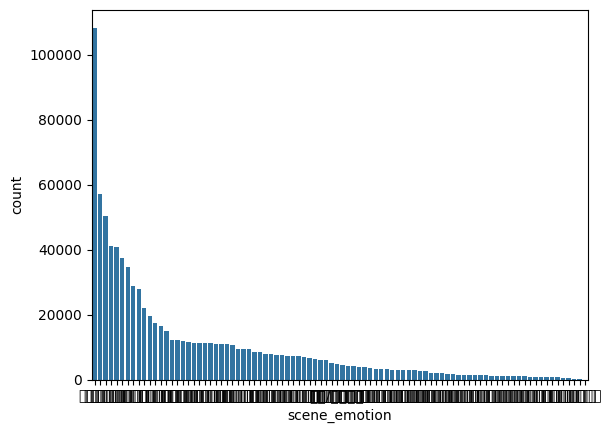

In [13]:
sns.barplot(x=df1.value_counts().index, y=df1.value_counts())
plt.show()

In [14]:
df2.reset_index(inplace=True)
df2

,scene_emotion,count
0,담담하다,108395
1,궁금하다,57243
2,단호하다,50521
3,긴장되다,41231
4,놀라다,40791
...,...,...
85,외롭다,553
86,상쾌하다,377
87,역겹다,308
88,싫증나다,182
